In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn import preprocessing

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
bankdata = pd.read_csv("bank-full.csv",sep=";")
bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bankdata.isnull().sum() 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

no null values are there in data

In [5]:
bankdata.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


there is a huge difference between the third quartile and the max value for age, balance,duration,campaign,pdays, previous. So there is a greater possibility of having outliers in these columns

# Data visualization - Box Plot

C:\Users\Kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

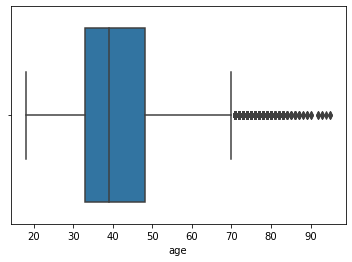

In [6]:
sb.boxplot(bankdata['age'])

1. We can see that the Age values lies from 20 to 70 (Approx.)
2. Most of the age values are between 30 to 50.
3. There are few outlier values more than 70.

C:\Users\Kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

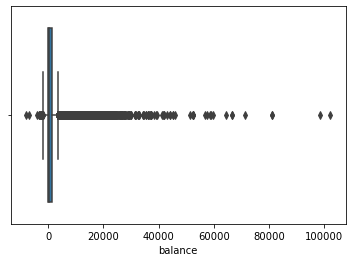

In [7]:
sb.boxplot(bankdata['balance'])

this boxplot looks very unsual kind of. very less no. of people are having balance more than 60k.

C:\Users\Kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day'>

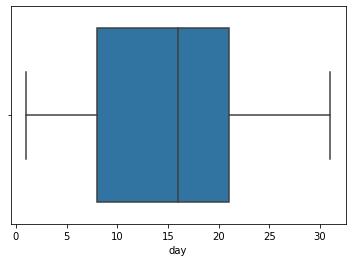

In [8]:
sb.boxplot(bankdata['day'])

C:\Users\Kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

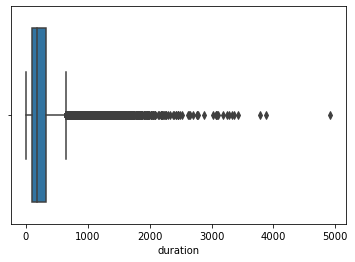

In [9]:
sb.boxplot(bankdata['duration'])

huge no. of outliers

C:\Users\Kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='campaign'>

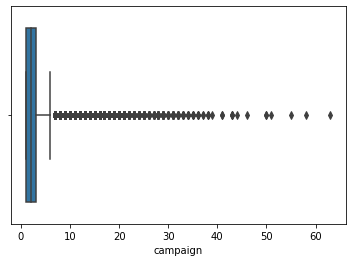

In [10]:
sb.boxplot(bankdata['campaign'])

C:\Users\Kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pdays'>

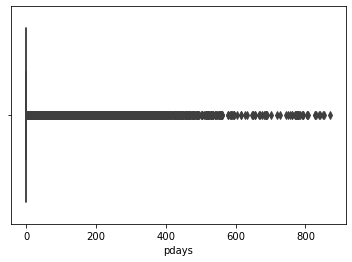

In [11]:
sb.boxplot(bankdata['pdays'])

C:\Users\Kiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='previous'>

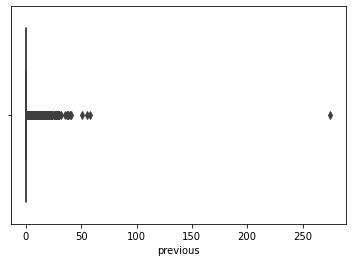

In [12]:
sb.boxplot(bankdata['previous'])

# Categorical Variables

In [13]:
# job
bankdata['job'].describe()

count           45211
unique             12
top       blue-collar
freq             9732
Name: job, dtype: object

There are total 12 unique values for job, so we can't use one hot encoding as 12 new columns will be added. So we will use label encoding.

In [14]:
label_encoder = preprocessing.LabelEncoder() 
 
bankdata['job']= label_encoder.fit_transform(bankdata['job']) 
  
bankdata['job'].unique()

array([ 4,  9,  2,  1, 11,  5,  0,  7,  6, 10,  3,  8])

In [15]:
# marital
bankdata['marital'].describe()

count       45211
unique          3
top       married
freq        27214
Name: marital, dtype: object

There are 3 values for marital, so let's use one hot encoding

In [16]:
bankdata = pd.get_dummies(bankdata, columns=['marital'])
bankdata.head()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,marital_divorced,marital_married,marital_single
0,58,4,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,1,0
1,44,9,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,0,1
2,33,2,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,1,0
3,47,1,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,1,0
4,33,11,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,0,1


In [17]:
bankdata['education'].describe()

count         45211
unique            4
top       secondary
freq          23202
Name: education, dtype: object

In [18]:
bankdata['education']= label_encoder.fit_transform(bankdata['education']) 
  
bankdata['education'].unique()

array([2, 1, 3, 0])

In [19]:
bankdata = pd.get_dummies(bankdata, columns=['default'])
bankdata.head()

,age,job,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,marital_divorced,marital_married,marital_single,default_no,default_yes
0,58,4,2,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,1,0,1,0
1,44,9,1,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,0,1,1,0
2,33,2,1,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,1,0,1,0
3,47,1,3,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,1,0,1,0
4,33,11,3,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,0,1,1,0


In [20]:
bankdata['housing'].describe()

count     45211
unique        2
top         yes
freq      25130
Name: housing, dtype: object

In [21]:
bankdata = pd.get_dummies(bankdata, columns=['housing'])
bankdata.head()

,age,job,education,balance,loan,contact,day,month,duration,campaign,...,previous,poutcome,y,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes
0,58,4,2,2143,no,unknown,5,may,261,1,...,0,unknown,no,0,1,0,1,0,0,1
1,44,9,1,29,no,unknown,5,may,151,1,...,0,unknown,no,0,0,1,1,0,0,1
2,33,2,1,2,yes,unknown,5,may,76,1,...,0,unknown,no,0,1,0,1,0,0,1
3,47,1,3,1506,no,unknown,5,may,92,1,...,0,unknown,no,0,1,0,1,0,0,1
4,33,11,3,1,no,unknown,5,may,198,1,...,0,unknown,no,0,0,1,1,0,1,0


In [22]:
bankdata['loan'].describe()

count     45211
unique        2
top          no
freq      37967
Name: loan, dtype: object

In [23]:
bankdata = pd.get_dummies(bankdata, columns=['loan'])
bankdata.head()

,age,job,education,balance,contact,day,month,duration,campaign,pdays,...,y,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,58,4,2,2143,unknown,5,may,261,1,-1,...,no,0,1,0,1,0,0,1,1,0
1,44,9,1,29,unknown,5,may,151,1,-1,...,no,0,0,1,1,0,0,1,1,0
2,33,2,1,2,unknown,5,may,76,1,-1,...,no,0,1,0,1,0,0,1,0,1
3,47,1,3,1506,unknown,5,may,92,1,-1,...,no,0,1,0,1,0,0,1,1,0
4,33,11,3,1,unknown,5,may,198,1,-1,...,no,0,0,1,1,0,1,0,1,0


In [24]:
bankdata['contact'].describe()

count        45211
unique           3
top       cellular
freq         29285
Name: contact, dtype: object

In [25]:
bankdata = pd.get_dummies(bankdata, columns=['contact'])
bankdata.head()

,age,job,education,balance,day,month,duration,campaign,pdays,previous,...,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown
0,58,4,2,2143,5,may,261,1,-1,0,...,0,1,0,0,1,1,0,0,0,1
1,44,9,1,29,5,may,151,1,-1,0,...,1,1,0,0,1,1,0,0,0,1
2,33,2,1,2,5,may,76,1,-1,0,...,0,1,0,0,1,0,1,0,0,1
3,47,1,3,1506,5,may,92,1,-1,0,...,0,1,0,0,1,1,0,0,0,1
4,33,11,3,1,5,may,198,1,-1,0,...,1,1,0,1,0,1,0,0,0,1


In [26]:
bankdata['month']= label_encoder.fit_transform(bankdata['month']) 
  
bankdata['month'].unique()

array([ 8,  6,  5,  1, 10,  9,  2,  4,  3,  7,  0, 11])

In [27]:
bankdata.head()

,age,job,education,balance,day,month,duration,campaign,pdays,previous,...,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown
0,58,4,2,2143,5,8,261,1,-1,0,...,0,1,0,0,1,1,0,0,0,1
1,44,9,1,29,5,8,151,1,-1,0,...,1,1,0,0,1,1,0,0,0,1
2,33,2,1,2,5,8,76,1,-1,0,...,0,1,0,0,1,0,1,0,0,1
3,47,1,3,1506,5,8,92,1,-1,0,...,0,1,0,0,1,1,0,0,0,1
4,33,11,3,1,5,8,198,1,-1,0,...,1,1,0,1,0,1,0,0,0,1


In [28]:
bankdata['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [29]:
bankdata = pd.get_dummies(bankdata, columns=['poutcome'])
bankdata.head()

,age,job,education,balance,day,month,duration,campaign,pdays,previous,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,4,2,2143,5,8,261,1,-1,0,...,1,1,0,0,0,1,0,0,0,1
1,44,9,1,29,5,8,151,1,-1,0,...,1,1,0,0,0,1,0,0,0,1
2,33,2,1,2,5,8,76,1,-1,0,...,1,0,1,0,0,1,0,0,0,1
3,47,1,3,1506,5,8,92,1,-1,0,...,1,1,0,0,0,1,0,0,0,1
4,33,11,3,1,5,8,198,1,-1,0,...,0,1,0,0,0,1,0,0,0,1


In [30]:
bankdata['y'].describe()

count     45211
unique        2
top          no
freq      39922
Name: y, dtype: object

In [31]:
bankdata['y'].unique()

array(['no', 'yes'], dtype=object)

In [57]:
bankdata['y'].head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [32]:
bankdata['y']= label_encoder.fit_transform(bankdata['y']) 

In [56]:
bankdata['y'].head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [34]:
pd.set_option('display.max_columns',None)

# Fitting a Logistic Regression Model

Let's separate out target var Y and input variables X

In [35]:
X = bankdata.drop('y',axis=1)
Y = bankdata['y']


In [36]:
X.head()

,age,job,education,balance,day,month,duration,campaign,pdays,previous,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,4,2,2143,5,8,261,1,-1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1
1,44,9,1,29,5,8,151,1,-1,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1
2,33,2,1,2,5,8,76,1,-1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1
3,47,1,3,1506,5,8,92,1,-1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1
4,33,11,3,1,5,8,198,1,-1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1


In [37]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [38]:
classifier = LogisticRegression(class_weight="balanced")
classifier.fit(X,Y)

C:\Users\Kiran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [45]:
classifier.coef_

array([[-9.86592333e-03,  3.54656627e-02,  4.69561666e-02,
         4.30321691e-05, -1.78664044e-02, -5.80724198e-02,
         4.55209327e-03, -3.37835411e-01,  5.60474357e-04,
         2.14022912e-01,  8.01488340e-04, -7.21709678e-02,
         1.81562580e-02, -4.59102789e-02, -7.30294260e-03,
         1.66185294e-01, -2.19398516e-01,  1.45546223e-02,
        -6.77678438e-02,  7.51092604e-02,  1.82868257e-02,
        -1.46609307e-01, -3.88868406e-02, -4.34116037e-03,
         1.19300095e-01, -1.29285316e-01]])

In [39]:
y_pred = classifier.predict(X)

In [42]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted': y_pred})

In [43]:
y_pred_df.head()

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In the above dataframe, we are comparing our actual vs predicted values for y


# Checking model accuracy

<b>Confusion Matrix for the model accuracy</b>

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[31132  8790]
 [ 1245  4044]]


In [46]:
pd.crosstab(Y,y_pred)

col_0,0,1
y,,
0,31132,8790
1,1245,4044


In [53]:
# accuracy
(31132+4044)/(31132+4044+8790+1245)

0.7780407422972285

<b>The overall accuracy of the model is 77%</b>

### Classification report

In [54]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86     39922
           1       0.32      0.76      0.45      5289

    accuracy                           0.78     45211
   macro avg       0.64      0.77      0.65     45211
weighted avg       0.89      0.78      0.81     45211



this model is better at predicting no value of y (client hasn't subscribed a term deposit) than 1.

### ROC Curve

In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,y_pred)
Logit_roc_score  

0.7722132179303811

In [60]:
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

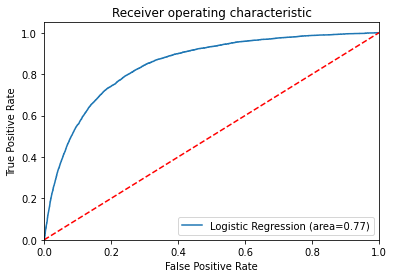

In [68]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

<b>AUC score is 0.77</b>